11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.5770 - loss: 1.2478 - val_accuracy: 0.8311 - val_loss: 0.5153
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8216 - loss: 0.5507 - val_accuracy: 0.8901 - val_loss: 0.3536
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.8686 - loss: 0.4062 - val_accuracy: 0.9030 - val_loss: 0.3022
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.8904 - loss: 0.3406 - val_accuracy: 0.9296 - val_loss: 0.2278
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.9041 - loss: 0.2985 - val_accuracy: 0.9286 - val_loss: 0.2170
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.9151 - loss: 0.2635 - val_accuracy: 0.9275 - val_loss: 0.2342
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9208 - loss: 0.2475 - val_accuracy: 0.9394 - val_loss: 0.1935
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9249 - loss: 0.2298 - 

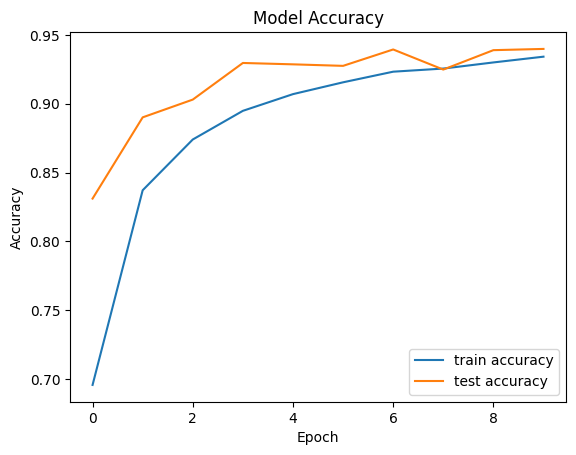

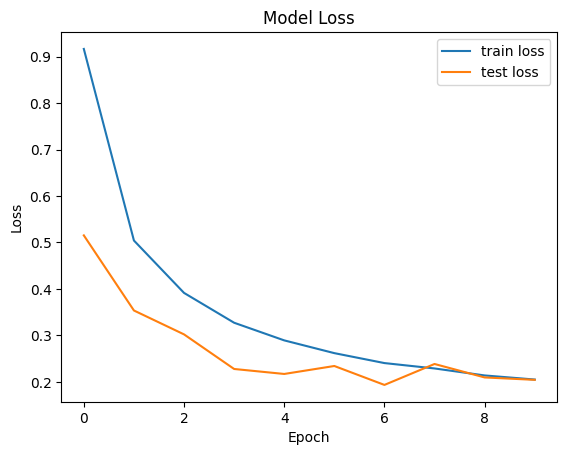

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255  # Reshape and normalize
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(28, 28, 1)),  # Specify input shape here
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])

# Create a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(data_augmentation)  # Include data augmentation in the model
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer

    return model

# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()